In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import math

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:
# !pip install openpyxl
df = pd.read_excel("CardioGoodFitness.xlsx")
df_copy = df.copy()

In [3]:
df_copy.head()

,Product,Age,Gender,Education,Marital Status,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112.0
1,TM195,19,Male,15,Single,2,3,31836,75.2
2,TM195,19,Female,14,Partnered,4,3,30699,65.8
3,TM195,19,Male,12,Single,3,3,32973,84.6
4,TM195,20,Male,13,Partnered,4,2,35247,47.0


In [4]:
df_copy.shape

(180, 9)

In [5]:
df_copy.dtypes

Product            object
Age                 int64
Gender             object
Education           int64
Marital Status     object
Usage               int64
Fitness             int64
Income              int64
Miles             float64
dtype: object

In [6]:
df_copy.isnull().sum()

Product           0
Age               0
Gender            0
Education         0
Marital Status    0
Usage             0
Fitness           0
Income            0
Miles             0
dtype: int64

In [7]:
df_copy.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.175556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.864911
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.200000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,65.800000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.600000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df_copy["Age"].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [9]:
df_copy["Product"].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [10]:
print("Median Age of customers using the product TM195: ", df_copy[df_copy["Product"] == 'TM195']["Age"].median())

Median Age of customers using the product TM195:  26.0


In [11]:
print("Median Age of customers using the product TM498: ", df_copy[df_copy["Product"] == 'TM498']["Age"].median())

Median Age of customers using the product TM498:  26.0


In [12]:
print("Median Age of customers using the product TM798: ", df_copy[df_copy["Product"] == 'TM798']["Age"].median())

Median Age of customers using the product TM798:  27.0


<AxesSubplot: xlabel='Gender', ylabel='count'>

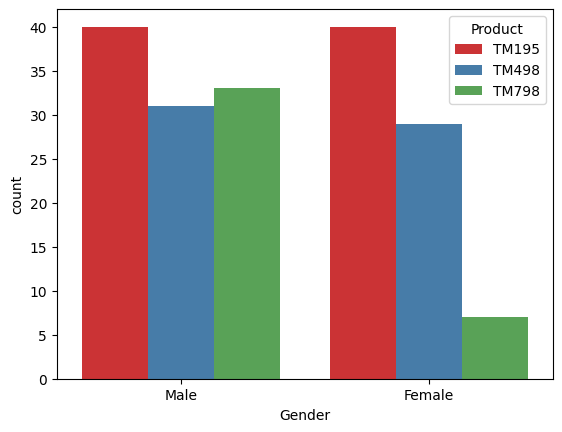

In [13]:
# Product type based on the gender
sns.countplot(data=df_copy, x = "Gender", hue = "Product", palette = "Set1")

<AxesSubplot: xlabel='Marital Status', ylabel='count'>

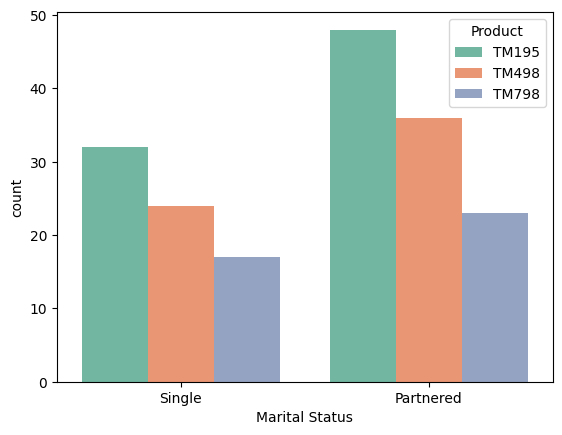

In [14]:
sns.countplot(data = df_copy, x = "Marital Status", hue = "Product", palette = "Set2")

In [15]:
# Education column defines the number of years spent in college.
df_copy["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [16]:
# Lets re-define the education column into Ranges

df_copy["Education"] = pd.cut(df_copy["Education"], bins = 5, labels = [1, 2, 3, 4, 5])

In [17]:
df_copy["Education"].value_counts()

3    85
2    60
4    23
1     8
5     4
Name: Education, dtype: int64

<AxesSubplot: xlabel='Education', ylabel='count'>

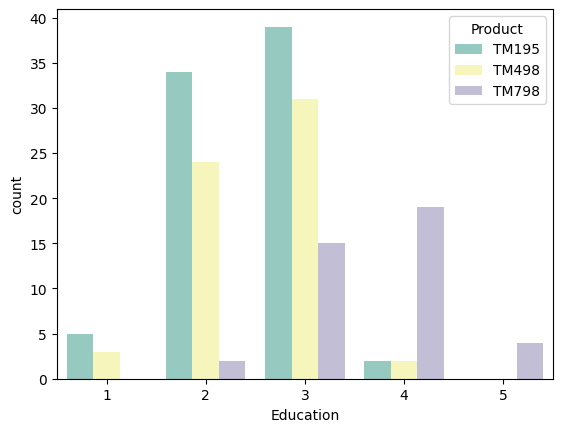

In [18]:
sns.countplot(data = df_copy, x = "Education", hue = "Product", palette = "Set3")

In [19]:
df_copy["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

<AxesSubplot: xlabel='Income', ylabel='Density'>

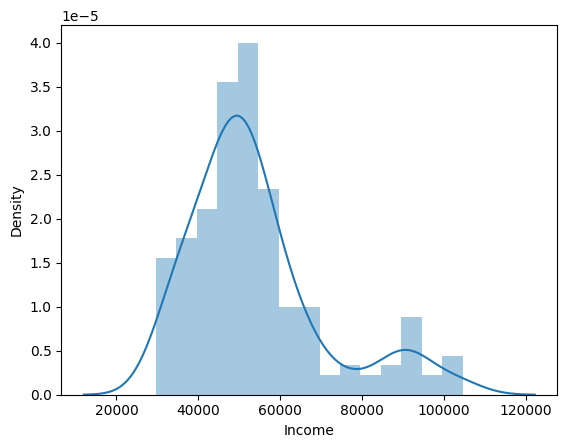

In [20]:
sns.distplot(df_copy["Income"], kde=True)

In [21]:
# Dividing the income column into slabs
df_copy["Income"] = pd.cut(df_copy["Income"], bins = 5, labels = ["Slab 1", "Slab 2", "Slab 3", "Slab 4", "Slab 5"])

In [22]:
df_copy["Income"].value_counts()

Slab 2    89
Slab 1    49
Slab 3    20
Slab 5    14
Slab 4     8
Name: Income, dtype: int64

<AxesSubplot: xlabel='Income', ylabel='count'>

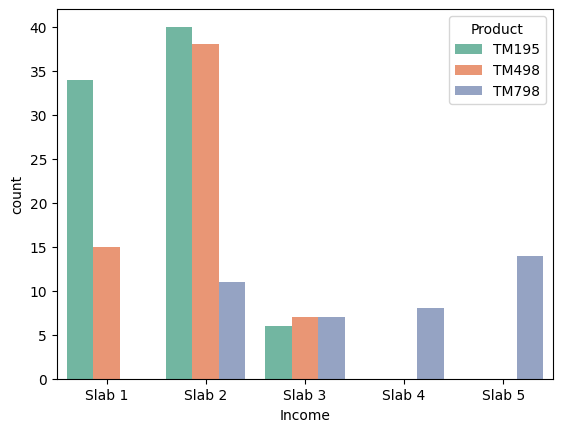

In [23]:
sns.countplot(data = df_copy, x = "Income", hue = "Product", palette = "Set2")

In [24]:
# Treadmill Usage per week  and their Purchase Priority

df_copy["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

<AxesSubplot: xlabel='Usage', ylabel='count'>

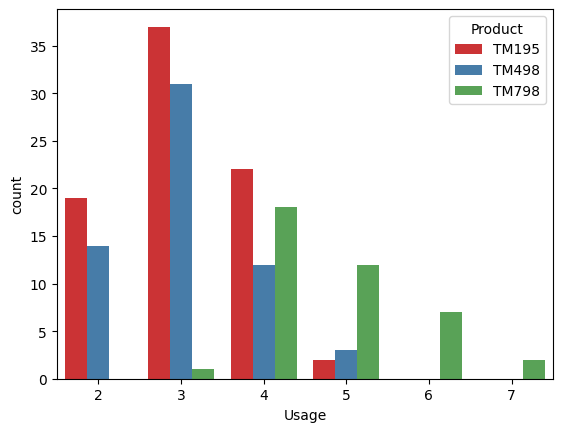

In [25]:
sns.countplot(data = df_copy, x = "Usage", hue = "Product", palette = "Set1")

In [26]:
df_copy["Miles"].describe()

count    180.000000
mean     103.175556
std       51.864911
min       21.200000
25%       65.800000
50%       94.000000
75%      114.600000
max      360.000000
Name: Miles, dtype: float64

In [27]:
df_copy["Miles"] = pd.cut(df_copy["Miles"], bins = 4, labels = ["Beginner", "Intermediate", "Moderate", "Advanced"])

<AxesSubplot: xlabel='Miles', ylabel='count'>

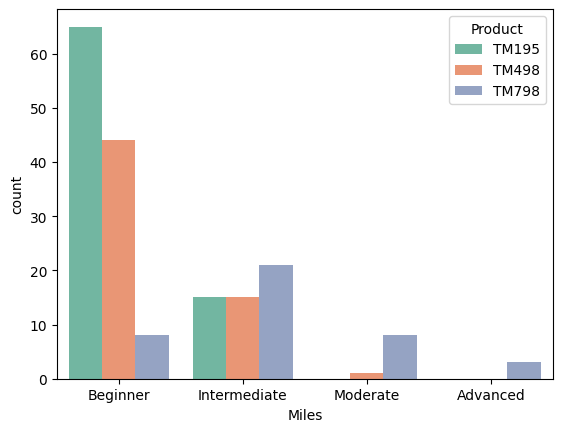

In [28]:
sns.countplot(data = df_copy, x = "Miles", hue = "Product", palette = "Set2")

In [29]:
# Fitness Rating Vs the Type of product
# Self Rated Fitness on a scale of 1 - 5 ==> Poor Shape to Excellent Shape

df_copy["Fitness"].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

<AxesSubplot: xlabel='Fitness', ylabel='count'>

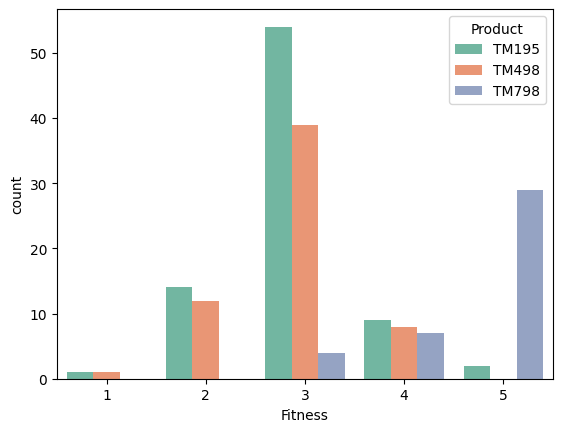

In [30]:
sns.countplot(data=df_copy, x = "Fitness", hue = "Product", palette = "Set2")

In [31]:
# Separating out Products

In [32]:
df_TM195 = df[df['Product'] == 'TM195']
df_TM498 = df[df['Product'] == 'TM498']
df_TM798 = df[df['Product'] == 'TM798']

In [33]:
df_TM195.shape

(80, 9)

In [34]:
df_TM498.shape

(60, 9)

In [35]:
df_TM798.shape

(40, 9)

In [37]:
# Sample Size for computing confidence intervals
sample_size = 40

### *Mean values of Age and Income for the Product types*

In [38]:
mean_age_TM195 = df_TM195['Age'].mean()
mean_income_TM195 = df_TM195['Income'].mean()

print('Mean Age of users for TM195: ', mean_age_TM195)
print('Mean Income of users for TM195: ', mean_income_TM195)

Mean Age of users for TM195:  28.55
Mean Income of users for TM195:  46418.025


In [39]:
mean_age_TM498 = df_TM498['Age'].mean()
mean_income_TM498 = df_TM498['Income'].mean()

print('Mean Age of users for TM498: ', mean_age_TM498)
print('Mean Income of users for TM498: ', mean_income_TM498)

Mean Age of users for TM498:  28.9
Mean Income of users for TM498:  48973.65


In [40]:
mean_age_TM798 = df_TM798['Age'].mean()
mean_income_TM798 = df_TM798['Income'].mean()

print('Mean Age of users for TM798: ', mean_age_TM798)
print('Mean Income of users for TM798: ', mean_income_TM798)

Mean Age of users for TM798:  29.1
Mean Income of users for TM798:  75441.575


### *Confidence intervals for the mean features of product TM195*

In [41]:
# Bootstrapping the data to obtain samples

mean_ages_TM195 = []
avg_miles_TM195 = []

for i in range(1000):
    bootstrap_sample_TM195 = df_TM195.sample(sample_size, replace=True)
    mean_age = bootstrap_sample_TM195['Age'].mean()
    avg_miles = bootstrap_sample_TM195['Miles'].mean()
    mean_ages_TM195.append(mean_age)
    avg_miles_TM195.append(avg_miles)

In [42]:
print("Length of the bootstrapped means: ", len(mean_ages_TM195))

Length of the bootstrapped means:  1000


### *Plotting the distribution of mean age*

(array([  6.,  41., 117., 239., 229., 198., 111.,  43.,  13.,   3.]),
 array([25.3   , 26.0225, 26.745 , 27.4675, 28.19  , 28.9125, 29.635 ,
        30.3575, 31.08  , 31.8025, 32.525 ]),
 <BarContainer object of 10 artists>)

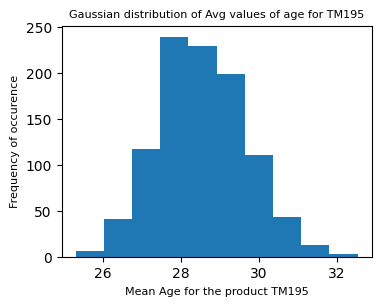

In [43]:
plt.figure(figsize=(4, 3))
plt.xlabel('Mean Age for the product TM195', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Avg values of age for TM195', size=8)
plt.hist(mean_ages_TM195, bins = 10)

In [44]:
import statistics as sts
from scipy.stats import norm

In [45]:
# Estimating Population parameters
mu_TM195 = np.round(sts.mean(mean_ages_TM195), 2)
sigma_TM195 = np.round(sts.stdev(mean_ages_TM195) * np.sqrt(sample_size), 2)

# Sample parameters
sample_mean = mu_TM195
sample_std =  np.round(sts.stdev(mean_ages_TM195), 2)

print('Population Mean of Age for TM195: ', mu_TM195)
print('Population Std.dev of Age for TM195: ', sigma_TM195)

print('Sample Mean of Age for TM195: ', sample_mean)
print('Sample Std Dev of Age for TM195: ', sample_std)

Population Mean of Age for TM195:  28.55
Population Std.dev of Age for TM195:  7.07
Sample Mean of Age for TM195:  28.55
Sample Std Dev of Age for TM195:  1.12


In [46]:
# Computing the limits of 95% confidence interval

lower_age_TM195 = np.round(np.percentile(mean_ages_TM195, 2.5), 3)
upper_age_TM195 = np.round(np.percentile(mean_ages_TM195, 97.5), 3)

print('Lower Limit of 95% CI for Age (TM195): ', lower_age_TM195)
print('Upper Limit of 95% CI for Age (TM195): ', upper_age_TM195)

Lower Limit of 95% CI for Age (TM195):  26.475
Upper Limit of 95% CI for Age (TM195):  30.801


In [47]:
# Converting the limits into Z-scores respectively

z1 = np.round((lower_age_TM195 - sample_mean)/sample_std, 2)
z2 = np.round((upper_age_TM195 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

# Defining the graph limits

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.85 2.01


In [61]:
def plot_confidence_interval(x_all, y2, x, y, product, lower, upper, color = 'r'):
    fig, ax = plt.subplots(figsize = (6, 4))
    plt.style.use('fivethirtyeight')

    ax.plot(x_all,y2)

    ax.fill_between(x,y,0, alpha=0.3, color=color)
    ax.fill_between(x_all,y2,0, alpha=0.1)
    ax.set_xlim([-4,4])
    ax.set_xlabel(r'$\bar{X}$'+ '  ('+product+')', size = 10)
    ax.set_title('95% Confidence Interval for Mean Age of samples for '+product, size = 10)
    ax.annotate(lower, (z1, 0), size = 10, horizontalalignment='center', verticalalignment = 'baseline')
    ax.annotate(upper, (z2, 0), size = 10, horizontalalignment='center', verticalalignment = 'baseline')
    ax.set_facecolor("white")
    ax.grid(False)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)

    plt.axvline(x = z1, color='r', linestyle='--', linewidth = 1)
    plt.axvline(x = z2, color='r', linestyle='--', linewidth = 1)

    plt.show()

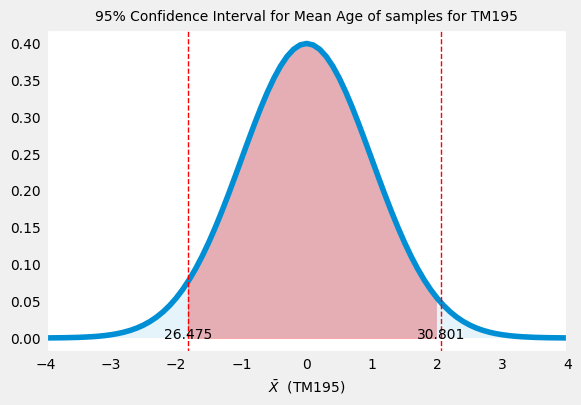

In [62]:
plot_confidence_interval(x_all, y2, x, y, 'TM195', lower_age_TM195, upper_age_TM195)

### *Plotting the distribution of average miles*

(array([  9.,  35.,  81., 217., 227., 194., 124.,  73.,  31.,   9.]),
 array([69.99  , 72.6435, 75.297 , 77.9505, 80.604 , 83.2575, 85.911 ,
        88.5645, 91.218 , 93.8715, 96.525 ]),
 <BarContainer object of 10 artists>)

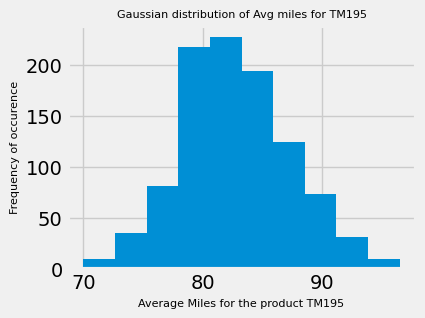

In [63]:
plt.figure(figsize=(4, 3))
plt.xlabel('Average Miles for the product TM195', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Avg miles for TM195', size=8)
plt.hist(avg_miles_TM195, bins = 10)

In [64]:
# Estimating Population parameters
mu_TM195 = np.round(sts.mean(avg_miles_TM195), 2)
sigma_TM195 = np.round(sts.stdev(avg_miles_TM195) * np.sqrt(sample_size), 2)

# Sample parameters
sample_mean = mu_TM195
sample_std =  np.round(sts.stdev(avg_miles_TM195), 2)

print('Population Mean of Miles for TM195: ', mu_TM195)
print('Population Std.dev of Miles for TM195: ', sigma_TM195)

print('Sample Mean of Miles for TM195: ', sample_mean)
print('Sample Std Dev of Miles for TM195: ', sample_std)

Population Mean of Miles for TM195:  82.77
Population Std.dev of Miles for TM195:  28.74
Sample Mean of Miles for TM195:  82.77
Sample Std Dev of Miles for TM195:  4.54


In [65]:
# Computing the limits of 95% confidence interval

lower_miles_TM195 = np.round(np.percentile(avg_miles_TM195, 2.5), 3)
upper_miles_TM195 = np.round(np.percentile(avg_miles_TM195, 97.5), 3)

print('Lower Limit of 95% CI for Miles (TM195): ', lower_miles_TM195)
print('Upper Limit of 95% CI for Miles (TM195): ', upper_miles_TM195)

Lower Limit of 95% CI for Miles (TM195):  74.495
Upper Limit of 95% CI for Miles (TM195):  92.125


In [66]:
# Converting the limits into Z-scores respectively

z1 = np.round((lower_miles_TM195 - sample_mean)/sample_std, 2)
z2 = np.round((upper_miles_TM195 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

# Defining the graph limits

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.82 2.06


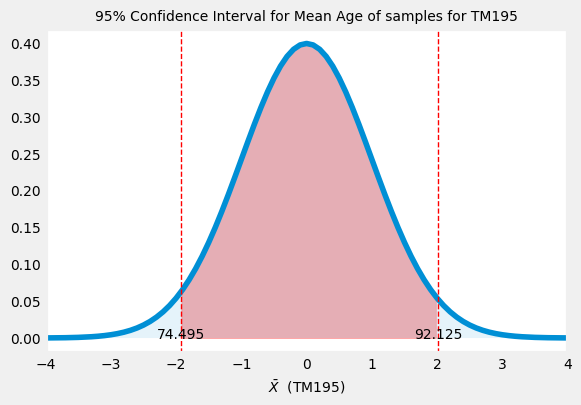

In [83]:
plot_confidence_interval(x_all, y2, x, y, 'TM195', lower_miles_TM195, upper_miles_TM195, color = 'r')

### Product TM798

### *Confidence intervals for the mean age of product TM798*

In [84]:
# Bootstrapping the data to obtain samples

mean_ages_TM798 = []
avg_miles_TM798 = []

for i in range(1000):
    bootstrap_sample_TM798 = df_TM798.sample(sample_size, replace=True)
    mean_age = bootstrap_sample_TM798['Age'].mean()
    avg_miles = bootstrap_sample_TM798['Miles'].mean()
    mean_ages_TM798.append(mean_age)
    avg_miles_TM798.append(avg_miles)

In [85]:
print("Length of the bootstrapped means: ", len(mean_ages_TM798))

Length of the bootstrapped means:  1000


### *Plotting the distribution of mean age*

(array([ 19.,  68., 138., 188., 242., 183.,  83.,  53.,  19.,   7.]),
 array([26.4 , 27.03, 27.66, 28.29, 28.92, 29.55, 30.18, 30.81, 31.44,
        32.07, 32.7 ]),
 <BarContainer object of 10 artists>)

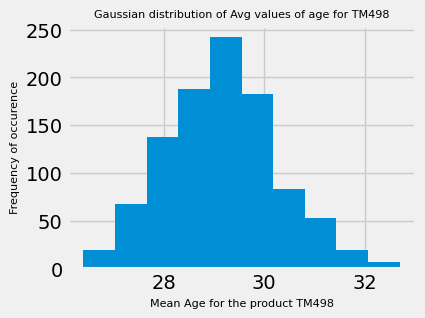

In [86]:
plt.figure(figsize=(4, 3))
plt.xlabel('Mean Age for the product TM498', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Avg values of age for TM498', size=8)
plt.hist(mean_ages_TM798, bins = 10)

In [87]:
# Estimating Population parameters
mu_TM798 = np.round(sts.mean(mean_ages_TM798), 2)
sigma_TM798 = np.round(sts.stdev(mean_ages_TM798) * np.sqrt(sample_size), 2)

# Sample parameters
sample_mean = mu_TM798
sample_std =  np.round(sts.stdev(mean_ages_TM798), 2)

print('Population Mean of Age for TM798: ', mu_TM798)
print('Population Std.dev of Age for TM798: ', sigma_TM798)

print('Sample Mean of Age for TM798: ', sample_mean)
print('Sample Std Dev of Age for TM798: ', sample_std)

Population Mean of Age for TM798:  29.15
Population Std.dev of Age for TM798:  6.97
Sample Mean of Age for TM798:  29.15
Sample Std Dev of Age for TM798:  1.1


In [88]:
# Computing the limits of 95% confidence interval

lower_age_TM798 = np.round(np.percentile(mean_ages_TM798, 2.5), 3)
upper_age_TM798 = np.round(np.percentile(mean_ages_TM798, 97.5), 3)

print('Lower Limit of 95% CI for Age (TM798): ', lower_age_TM798)
print('Upper Limit of 95% CI for Age (TM798): ', upper_age_TM798)

Lower Limit of 95% CI for Age (TM798):  27.149
Upper Limit of 95% CI for Age (TM798):  31.45


In [89]:
# Converting the limits into Z-scores respectively

z1 = np.round((lower_age_TM798 - sample_mean)/sample_std, 2)
z2 = np.round((upper_age_TM798 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

# Defining the graph limits

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.82 2.09


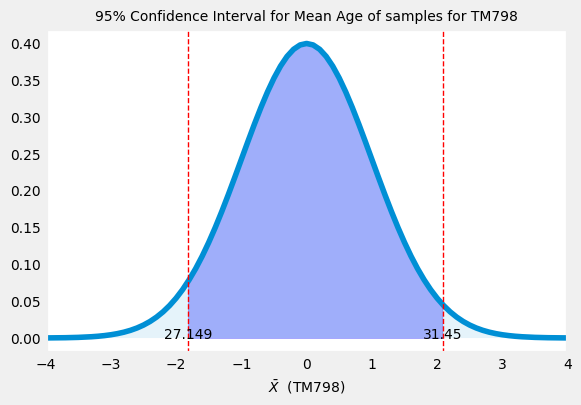

In [90]:
plot_confidence_interval(x_all, y2, x, y, 'TM798', lower_age_TM798, upper_age_TM798, 'b')

### *Plotting the distribution of average miles*

(array([  2.,   9.,  40., 168., 258., 262., 160.,  70.,  21.,  10.]),
 array([134.05 , 140.485, 146.92 , 153.355, 159.79 , 166.225, 172.66 ,
        179.095, 185.53 , 191.965, 198.4  ]),
 <BarContainer object of 10 artists>)

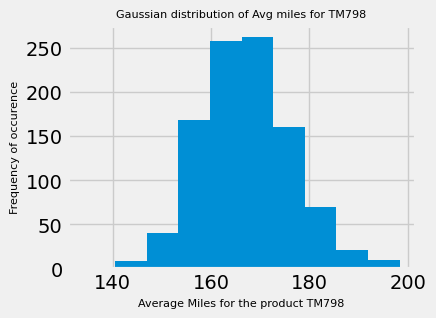

In [92]:
plt.figure(figsize=(4, 3))
plt.xlabel('Average Miles for the product TM798', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Avg miles for TM798', size=8)
plt.hist(avg_miles_TM798, bins = 10)

In [93]:
# Estimating Population parameters
mu_TM798 = np.round(sts.mean(avg_miles_TM798), 2)
sigma_TM798 = np.round(sts.stdev(avg_miles_TM798) * np.sqrt(sample_size), 2)

# Sample parameters
sample_mean = mu_TM798
sample_std =  np.round(sts.stdev(avg_miles_TM798), 2)

print('Population Mean of Miles for TM798: ', mu_TM798)
print('Population Std.dev of Miles for TM798: ', sigma_TM798)

print('Sample Mean of Miles for TM798: ', sample_mean)
print('Sample Std Dev of Miles for TM798: ', sample_std)

Population Mean of Miles for TM798:  167.05
Population Std.dev of Miles for TM798:  58.69
Sample Mean of Miles for TM798:  167.05
Sample Std Dev of Miles for TM798:  9.28


In [94]:
# Computing the limits of 95% confidence interval

lower_miles_TM798 = np.round(np.percentile(avg_miles_TM798, 2.5), 3)
upper_miles_TM798 = np.round(np.percentile(avg_miles_TM798, 97.5), 3)

print('Lower Limit of 95% CI for Miles (TM798): ', lower_miles_TM798)
print('Upper Limit of 95% CI for Miles (TM798): ', upper_miles_TM798)

Lower Limit of 95% CI for Miles (TM798):  150.79
Upper Limit of 95% CI for Miles (TM798):  187.001


In [95]:
# Converting the limits into Z-scores respectively

z1 = np.round((lower_miles_TM798 - sample_mean)/sample_std, 2)
z2 = np.round((upper_miles_TM798 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

# Defining the graph limits

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.75 2.15


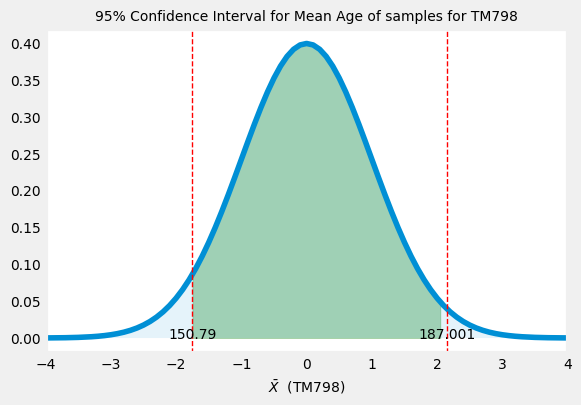

In [96]:
plot_confidence_interval(x_all, y2, x, y, 'TM798', lower_miles_TM798, upper_miles_TM798, color = 'g')

### Product TM498

### *Confidence intervals for the mean age of product TM498*

In [68]:
# Bootstrapping the data to obtain samples

mean_ages_TM498 = []
avg_miles_TM498 = []

for i in range(1000):
    bootstrap_sample_TM498 = df_TM498.sample(sample_size, replace=True)
    mean_age = bootstrap_sample_TM498['Age'].mean()
    avg_miles = bootstrap_sample_TM498['Miles'].mean()
    mean_ages_TM498.append(mean_age)
    avg_miles_TM498.append(avg_miles)

In [69]:
print("Length of the bootstrapped means: ", len(mean_ages_TM498))

Length of the bootstrapped means:  1000


### *Plotting the distribution of mean age*

(array([ 18.,  56., 147., 220., 214., 193., 100.,  37.,  11.,   4.]),
 array([26.2 , 26.83, 27.46, 28.09, 28.72, 29.35, 29.98, 30.61, 31.24,
        31.87, 32.5 ]),
 <BarContainer object of 10 artists>)

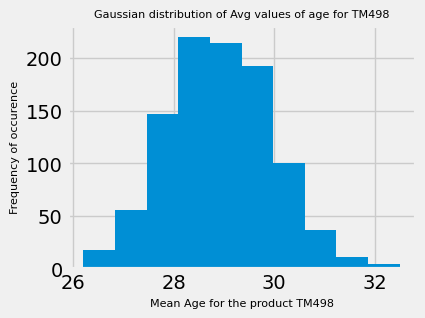

In [72]:
plt.figure(figsize=(4, 3))
plt.xlabel('Mean Age for the product TM498', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Avg values of age for TM498', size=8)
plt.hist(mean_ages_TM498, bins = 10)

In [73]:
# Estimating Population parameters
mu_TM498 = np.round(sts.mean(mean_ages_TM498), 2)
sigma_TM498 = np.round(sts.stdev(mean_ages_TM498) * np.sqrt(sample_size), 2)

# Sample parameters
sample_mean = mu_TM498
sample_std =  np.round(sts.stdev(mean_ages_TM498), 2)

print('Population Mean of Age for TM498: ', mu_TM498)
print('Population Std.dev of Age for TM498: ', sigma_TM498)

print('Sample Mean of Age for TM498: ', sample_mean)
print('Sample Std Dev of Age for TM498: ', sample_std)

Population Mean of Age for TM498:  28.91
Population Std.dev of Age for TM498:  6.52
Sample Mean of Age for TM498:  28.91
Sample Std Dev of Age for TM498:  1.03


In [74]:
# Computing the limits of 95% confidence interval

lower_age_TM498 = np.round(np.percentile(mean_ages_TM498, 2.5), 3)
upper_age_TM498 = np.round(np.percentile(mean_ages_TM498, 97.5), 3)

print('Lower Limit of 95% CI for Age (TM498): ', lower_age_TM498)
print('Upper Limit of 95% CI for Age (TM498): ', upper_age_TM498)

Lower Limit of 95% CI for Age (TM498):  26.974
Upper Limit of 95% CI for Age (TM498):  30.876


In [75]:
# Converting the limits into Z-scores respectively

z1 = np.round((lower_age_TM498 - sample_mean)/sample_std, 2)
z2 = np.round((upper_age_TM498 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

# Defining the graph limits

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.88 1.91


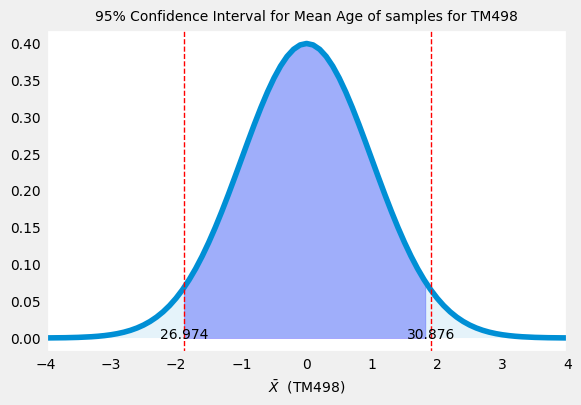

In [76]:
plot_confidence_interval(x_all, y2, x, y, 'TM498', lower_age_TM498, upper_age_TM498, 'b')

### *Plotting the distribution of average miles*

(array([  4.,  14.,  77., 210., 281., 225., 137.,  42.,   9.,   1.]),
 array([ 70.755 ,  74.4385,  78.122 ,  81.8055,  85.489 ,  89.1725,
         92.856 ,  96.5395, 100.223 , 103.9065, 107.59  ]),
 <BarContainer object of 10 artists>)

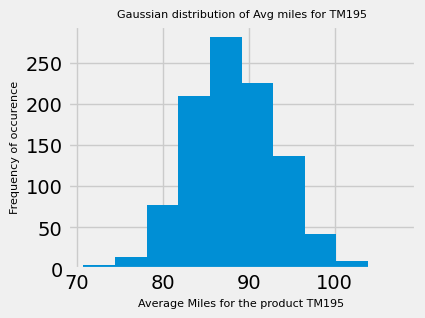

In [77]:
plt.figure(figsize=(4, 3))
plt.xlabel('Average Miles for the product TM195', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Avg miles for TM195', size=8)
plt.hist(avg_miles_TM498, bins = 10)

In [78]:
# Estimating Population parameters
mu_TM498 = np.round(sts.mean(avg_miles_TM498), 2)
sigma_TM498 = np.round(sts.stdev(avg_miles_TM498) * np.sqrt(sample_size), 2)

# Sample parameters
sample_mean = mu_TM498
sample_std =  np.round(sts.stdev(avg_miles_TM498), 2)

print('Population Mean of Miles for TM498: ', mu_TM498)
print('Population Std.dev of Miles for TM498: ', sigma_TM498)

print('Sample Mean of Miles for TM498: ', sample_mean)
print('Sample Std Dev of Miles for TM498: ', sample_std)

Population Mean of Miles for TM498:  88.26
Population Std.dev of Miles for TM498:  32.41
Sample Mean of Miles for TM498:  88.26
Sample Std Dev of Miles for TM498:  5.12


In [79]:
# Computing the limits of 95% confidence interval

lower_miles_TM498 = np.round(np.percentile(avg_miles_TM498, 2.5), 3)
upper_miles_TM498 = np.round(np.percentile(avg_miles_TM498, 97.5), 3)

print('Lower Limit of 95% CI for Miles (TM498): ', lower_miles_TM498)
print('Upper Limit of 95% CI for Miles (TM498): ', upper_miles_TM498)

Lower Limit of 95% CI for Miles (TM498):  78.44
Upper Limit of 95% CI for Miles (TM498):  98.587


In [80]:
# Converting the limits into Z-scores respectively

z1 = np.round((lower_miles_TM498 - sample_mean)/sample_std, 2)
z2 = np.round((upper_miles_TM498 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

# Defining the graph limits

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.92 2.02


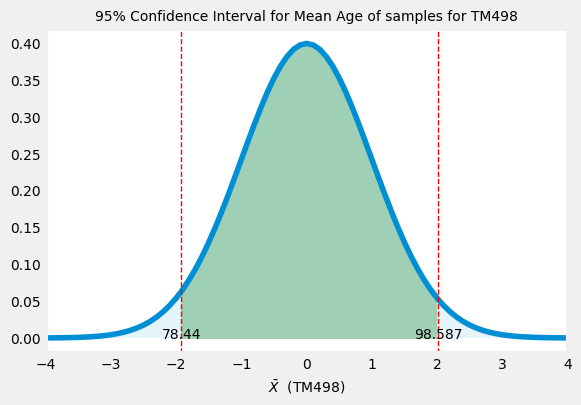

In [82]:
plot_confidence_interval(x_all, y2, x, y, 'TM498', lower_miles_TM498, upper_miles_TM498, color = 'g')

### *Confidence Interval for Mean difference in Income for TM195 and TM498*

In [66]:
avg_income_TM195 = df_copy[df_copy['Product'] == 'TM195']['Income'].mean()
avg_income_TM498 = df_copy[df_copy['Product'] == 'TM498']['Income'].mean()

print('Avg income of customers purchasing the Product TM198: ', avg_income_TM195)
print('Avg income of customers purchasing the Product TM498: ', avg_income_TM498)

Avg income of customers purchasing the Product TM198:  46418.025
Avg income of customers purchasing the Product TM498:  48973.65


In [67]:
mean_income_diff_195_498  = []

for i in range(1000):
    bootstrap_mean_TM195 = df_copy[df_copy['Product'] == 'TM195']['Income'].sample(sample_size, replace = True).mean()
    bootstrap_mean_TM498 = df_copy[df_copy['Product'] == 'TM498']['Income'].sample(sample_size, replace = True).mean()

    mean_diff = bootstrap_mean_TM195 - bootstrap_mean_TM498
    
    mean_income_diff_195_498.append(mean_diff)

(array([  1.,   8.,  40., 135., 240., 253., 211.,  75.,  33.,   4.]),
 array([-11080.5 ,  -9469.75,  -7859.  ,  -6248.25,  -4637.5 ,  -3026.75,
         -1416.  ,    194.75,   1805.5 ,   3416.25,   5027.  ]),
 <BarContainer object of 10 artists>)

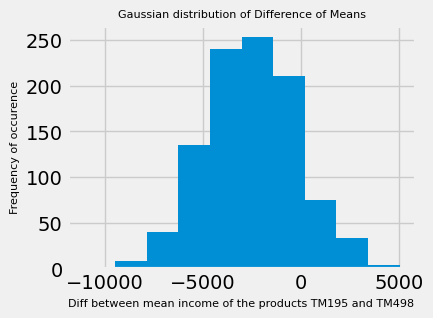

In [68]:
plt.figure(figsize=(4, 3))
plt.xlabel('Diff between mean income of the products TM195 and TM498', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Difference of Means', size=8)
plt.hist(mean_income_diff_195_498)

In [69]:
# Calculating the difference in population and sample parameters

sample_mean = np.round(sts.mean(mean_income_diff_195_498), 2)
sample_std = np.round(sts.stdev(mean_income_diff_195_498), 2)

print('Sample Mean of difference in income for TM195 and TM 498: ', abs(sample_mean))
print('Sample Std of difference in income for TM195 for TM498: ', abs(sample_std))

Sample Mean of difference in income for TM195 and TM 498:  2537.8
Sample Std of difference in income for TM195 for TM498:  2299.51


In [70]:
ll_diff_mean_TM195_498 = np.round(np.percentile(mean_income_diff_195_498, 2.5), 3)
ul_diff_mean_TM195_498 = np.round(np.percentile(mean_income_diff_195_498, 97.5), 3)

print('Lower Limit of 95% CI for diff in income for TM195 and TM498: ', ll_diff_mean_TM195_498)
print('Upper Limit of 95% CI for diff in income for TM195 and TM498:', ul_diff_mean_TM195_498)

Lower Limit of 95% CI for diff in income for TM195 and TM498:  -6835.7
Upper Limit of 95% CI for diff in income for TM195 and TM498: 1981.985


In [71]:
z1 = np.round((ll_diff_mean_TM195_498 - sample_mean)/sample_std, 2)
z2 = np.round((ul_diff_mean_TM195_498 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.87 1.97


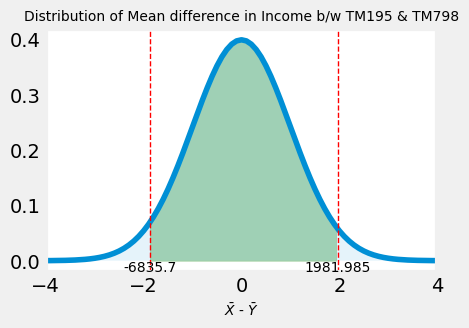

In [72]:
fig, ax = plt.subplots(figsize = (4.5, 3))
plt.style.use('fivethirtyeight')

ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='g')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel(r'$\bar{X}$'+' - '+r'$\bar{Y}$', size = 10)
ax.set_title('Distribution of Mean difference in Income b/w TM195 & TM798', size = 10)

ax.annotate(ll_diff_mean_TM195_498, (z1, 0), size = 10, horizontalalignment='center', verticalalignment = 'top', )
ax.annotate(ul_diff_mean_TM195_498, (z2, 0), size = 10, horizontalalignment='center', verticalalignment = 'top')
ax.set_facecolor("white")
ax.grid(False)

plt.axvline(x = z1, color='r', linestyle='--', linewidth = 1)
plt.axvline(x = z2, color='r', linestyle='--', linewidth = 1)

plt.show()

### *Confidence Interval for Mean difference in Income for TM498 and TM798*

In [73]:
# Verification

In [74]:
TM_498_sample = df_copy[df_copy['Product'] == 'TM498']['Income'].sample(30, replace = True)
TM_798_sample = df_copy[df_copy['Product'] == 'TM798']['Income'].sample(30, replace = True)

mean_TM498 = TM_498_sample.mean()
mean_TM798 = TM_798_sample.mean()

std_TM498 = TM_498_sample.std()
std_TM798 = TM_798_sample.std()

print('Mean of the sample from TM_498: ', mean_TM498)
print('Mean of the sample from TM_798: ', mean_TM798)

print('Std Deviation of the sample from TM_498: ', std_TM498)
print('Std Deviation of the sample from TM_798: ', std_TM798)

Mean of the sample from TM_498:  49118.4
Mean of the sample from TM_798:  74428.1
Std Deviation of the sample from TM_498:  7964.039291369849
Std Deviation of the sample from TM_798:  18772.342078909234


In [75]:
# confidence Interval for difference of means

lower = (mean_age_TM498 - mean_age_TM798) - (1.96 * np.sqrt((std_TM498 ** 2/30) + (std_TM798 ** 2 / 30)))
upper = (mean_age_TM498 - mean_age_TM798) + (1.96 * np.sqrt((std_TM498 ** 2/30) + (std_TM798 ** 2 / 30)))

print('Confidence Interval for difference of means: ({}, {})'.format(lower, upper))

Confidence Interval for difference of means: (-7297.322809282857, 7296.922809282857)


In [76]:
## Actual

In [77]:
avg_income_TM498 = df_copy[df_copy['Product'] == 'TM498']['Income'].mean()
avg_income_TM798 = df_copy[df_copy['Product'] == 'TM798']['Income'].mean()

print('Avg income of customers purchasing the Product TM498: ', avg_income_TM498)
print('Avg income of customers purchasing the Product TM798: ', avg_income_TM798)

Avg income of customers purchasing the Product TM498:  48973.65
Avg income of customers purchasing the Product TM798:  75441.575


In [78]:
mean_income_diff_498_798  = []

for i in range(1000):
    bootstrap_mean_TM498 = df_copy[df_copy['Product'] == 'TM498']['Income'].sample(sample_size, replace = True).mean()
    bootstrap_mean_TM798 = df_copy[df_copy['Product'] == 'TM798']['Income'].sample(sample_size, replace = True).mean()

    mean_diff = bootstrap_mean_TM498 - bootstrap_mean_TM798
    
    mean_income_diff_498_798.append(mean_diff)

(array([  8.,  29., 105., 185., 252., 234., 133.,  45.,   8.,   1.]),
 array([-37838.33333333, -35375.52666667, -32912.72      , -30449.91333333,
        -27987.10666667, -25524.3       , -23061.49333333, -20598.68666667,
        -18135.88      , -15673.07333333, -13210.26666667]),
 <BarContainer object of 10 artists>)

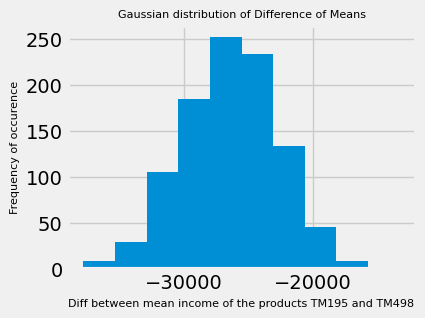

In [79]:
plt.figure(figsize=(4, 3))
plt.xlabel('Diff between mean income of the products TM195 and TM498', size=8)
plt.ylabel('Frequency of occurence', size=8)
plt.title('Gaussian distribution of Difference of Means', size=8)
plt.hist(mean_income_diff_498_798)

In [80]:
# Calculating the difference in population and sample parameters

sample_mean = np.round(sts.mean(mean_income_diff_498_798), 2)
sample_std = np.round(sts.stdev(mean_income_diff_498_798), 2)

print('Sample Mean of difference in income for TM498 and TM 798: ', abs(sample_mean))
print('Sample Std of difference in income for TM498 for TM798: ', abs(sample_std))

Sample Mean of difference in income for TM498 and TM 798:  26327.77
Sample Std of difference in income for TM498 for TM798:  3660.16


In [81]:
ll_diff_mean_TM498_798 = np.round(np.percentile(mean_income_diff_498_798, 2.5), 3)
ul_diff_mean_TM498_798 = np.round(np.percentile(mean_income_diff_498_798, 97.5), 3)

print('Lower Limit of 95% CI for diff in income for TM195 and TM498: ', ll_diff_mean_TM498_798)
print('Upper Limit of 95% CI for diff in income for TM195 and TM498:', ul_diff_mean_TM498_798)

Lower Limit of 95% CI for diff in income for TM195 and TM498:  -33373.19
Upper Limit of 95% CI for diff in income for TM195 and TM498: -19483.723


In [82]:
z1 = np.round((ll_diff_mean_TM498_798 - sample_mean)/sample_std, 2)
z2 = np.round((ul_diff_mean_TM498_798 - sample_mean)/sample_std, 2)

print('Limits in Z-scale: ', z1, z2)

x = np.arange(z1, z2, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Limits in Z-scale:  -1.92 1.87


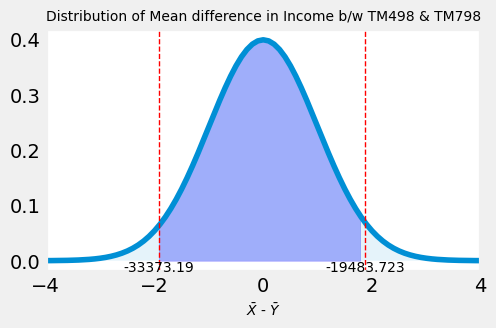

In [83]:
fig, ax = plt.subplots(figsize = (5, 3))
plt.style.use('fivethirtyeight')

ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel(r'$\bar{X}$'+' - '+r'$\bar{Y}$', size = 10)
ax.set_title('Distribution of Mean difference in Income b/w TM498 & TM798', size = 10)
ax.annotate(ll_diff_mean_TM498_798, (z1, 0), size = 10, horizontalalignment='center', 
            verticalalignment = 'top', )
ax.annotate(ul_diff_mean_TM498_798, (z2, 0), size = 10, horizontalalignment='center', verticalalignment = 'top')
ax.set_facecolor("white")
ax.grid(False)

plt.axvline(x = z1, color='r', linestyle='--', linewidth = 1)
plt.axvline(x = z2, color='r', linestyle='--', linewidth = 1)

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [84]:
## Hypothesis Testing 1

In [85]:
sample = df_copy[df_copy['Product'] == 'TM195']['Income'].sample(40, replace=True)

In [86]:
sample_mean = sample.mean()
sample_std = sample.std()

print('Sample Mean: ', sample_mean)
print('Sample Std: ', sample_std)

Sample Mean:  42438.525
Sample Std:  7618.041416597838


In [87]:
population = df_copy[df_copy['Product'] == 'TM195']['Income']
pop_mean = population.mean()
pop_std = population.std()

print('Population Mean: ', pop_mean)
print('Population Stdev: ', pop_std)

Population Mean:  46418.025
Population Stdev:  9075.783189658961


In [88]:
# Bootstrap

bootstrap_mean_list = []
for j in range(1000):
    sample =  df_copy[df_copy['Product'] == 'TM195']['Income'].sample(sample_size + 10, replace = True)
    sample_mean = sample.mean()
    bootstrap_mean_list.append(sample_mean)

In [89]:
print('Bootstrap Mean : ', np.round(sts.mean(bootstrap_mean_list), 5))
print('Bootstrap Stdev: ', np.round(sts.stdev(bootstrap_mean_list)))

Bootstrap Mean :  46485.6765
Bootstrap Stdev:  1440.0


In [90]:
# Let us perform a hypothesis test to infer if the mean income of Population purchasing the product TM195 is 
# Null Hypothesis:         H0 : mu >= 50,000  
# Alternative Hypothesis:  H1 : mu < 50,000

In [91]:
Z_score = (sample_mean - 50000)/(sample_std)

In [92]:
print(Z_score)

-0.4216897525656475


In [93]:
def decision(P_value):
    if(P_value > 0.05):
        print('P > 5% ::  We do not reject the Null hypothesis.')
    else:
        print('P < 5% :: We reject the Null hypothesis.')

In [94]:
import scipy.stats as stats

P_value = stats.norm(loc = 0, scale = 1).cdf(Z_score)
print('P-value: {} %'.format( np.round(P_value*100, 3)))

decision(P_value)

P-value: 33.663 %
P > 5% ::  We do not reject the Null hypothesis.


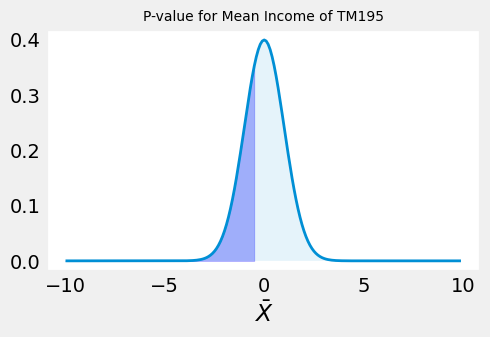

In [95]:
x = np.arange(-10, Z_score, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

fig, ax = plt.subplots(figsize = (5, 3))
plt.style.use('fivethirtyeight')

ax.plot(x_all,y2, linewidth = 2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_title('P-value for Mean Income of TM195', size = 10)
ax.set_xlabel(r'$\bar{X}$')

ax.set_facecolor("white")
ax.grid(False)

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [96]:
## Hypothesis testing 2

In [97]:
sample = df_copy[df_copy['Product'] == 'TM195']['Age'].sample(40, replace=True)

In [98]:
sample_mean = sample.mean()
sample_std = sample.std()

print('Sample Mean: ', sample_mean)
print('Sample Std: ', sample_std)

Sample Mean:  30.275
Sample Std:  8.670573576981292


In [99]:
population = df_copy[df_copy['Product'] == 'TM195']['Age']
pop_mean = population.mean()
pop_std = population.std()

print('Population Mean: ', pop_mean)
print('Population Stdev: ', pop_std)

Population Mean:  28.55
Population Stdev:  7.221451868468528


In [100]:
# Bootstrap

bootstrap_mean_list = []
for j in range(1000):
    sample =  df_copy[df_copy['Product'] == 'TM195']['Age'].sample(40, replace = True)
    sample_mean = sample.mean()
    bootstrap_mean_list.append(sample_mean)

In [101]:
print('Bootstrap Mean : ', np.round(sts.mean(bootstrap_mean_list), 5))
print('Bootstrap Stdev: ', np.round(sts.stdev(bootstrap_mean_list)))

Bootstrap Mean :  28.51112
Bootstrap Stdev:  1.0


In [102]:
# Let us perform a hypothesis test to infer if the mean income of Population purchasing the product TM195 is 
# Null Hypothesis:         H0 : mu_age < 15 
# Alternative Hypothesis:  H1 : mu_age >= 15

In [103]:
# Disagreement to the right
Z_score = (sample_mean - 15)/(sample_std)

In [104]:
print(Z_score)

1.5368072113908722


In [105]:
import scipy.stats as stats

P_value = ( 1 - stats.norm(loc = 0, scale = 1).cdf(Z_score))
print('P-value: {} %'.format( np.round(P_value*100, 3)))

decision(P_value)

P-value: 6.217 %
P > 5% ::  We do not reject the Null hypothesis.


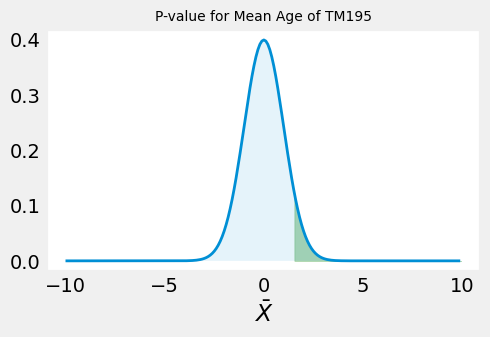

In [106]:
x = np.arange(Z_score, 10, 0.1)
x_all = np.arange(-10, 10, 0.1)

y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

fig, ax = plt.subplots(figsize = (5, 3))
plt.style.use('fivethirtyeight')

ax.plot(x_all,y2, linewidth = 2)

ax.fill_between(x,y,0, alpha=0.3, color='g')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_title('P-value for Mean Age of TM195', size = 10)
ax.set_xlabel(r'$\bar{X}$')

ax.set_facecolor("white")
ax.grid(False)

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [107]:
sample_miles_195 = df_copy[df_copy['Product'] == 'TM195']['Miles'].sample(40, replace=True)

In [108]:
print('Sample Mean of Miles for TM195: ', sample_miles_195.mean())
print('Sample Std of Miles for TM195: ', sample_miles_195.std())

Sample Mean of Miles for TM195:  78.47
Sample Std of Miles for TM195:  20.883095850656154


In [109]:
pop_mean = df_copy[df_copy['Product'] == 'TM195']['Miles'].mean()
pop_std = df_copy[df_copy['Product'] == 'TM195']['Miles'].std()

print('Population Mean of Miles for TM195: ', pop_mean)
print('Poopulation Std of Miles for Tm195: ', pop_std)

Population Mean of Miles for TM195:  82.71000000000001
Poopulation Std of Miles for Tm195:  28.852095990377798


In [110]:
bootstrap_mean_miles = []

for k in range(1000):
    sample = df_copy[df_copy['Product'] == 'TM195']['Miles'].sample(40, replace=True)
    sample_mean = sample.mean()
    bootstrap_mean_miles.append(sample_mean)

In [111]:
print('Bootstrap Mean: ', sts.mean(bootstrap_mean_miles))
print('Bootstrap std: ', sts.stdev(bootstrap_mean_miles))

Bootstrap Mean:  82.605805
Bootstrap std:  4.341812399434928


In [112]:
# Null hypothesis: mu < 70
# Alternative hypo: mu >=70

In [113]:
Z_score = (sample_miles_195.mean() - 70)/(sample_miles_195.std())
print(Z_score)

0.4055912045116562
